In [16]:
import numpy as np
import pandas as pd
import seaborn
import json
import matplotlib.pyplot as plt
from matplotlib import rcParams

seaborn.set(font_scale=1)
rcParams.update({"figure.autolayout": True})


In [17]:
def get_tables(dataframe, normalize=False):
    causes_names = [
        "API Misuse",
        "Incompatability",
        "Type Problem",
        "Shape Problem",
        "Incorrect Numerical Computation",
        "Incorrect Assignment",
        "Incorrect Exception Handling",
        "Misconfiguration",
        "Concurrency",
        "Algorithmic Error",
        "Typo",
        "Testing",
        "Documentation",
        "Others",
    ]
    symptoms_names = [
        "Crash",
        "Wrong Code",
        "Bad Performance",
        "Hang",
        "Build Failure",
        "Unreported",
    ]
    location_names = [
        "Node Transformation",
        "Graph Optimization",
        "Protobuf",
        "Tracer",
        "Validation",
        "Not Dis.",
    ]

    incompat_types = ["Internal", "External", "Resource"]

    type_types = ["Node", "Tensor", "Conventional"]

    symptoms = {key: 0 for key in symptoms_names}
    for idx, val in dataframe[["Symptoms"]].value_counts(normalize=normalize).items():
        symptoms[idx[0]] = val

    causes = {key: 0 for key in causes_names}
    for idx, val in dataframe[["Type"]].value_counts(normalize=normalize).items():
        causes[idx[0]] = val

    subtypes = {
        "Incompatability": {key: 0 for key in incompat_types},
        "Type Problem": {key: 0 for key in type_types},
    }
    for idx, val in (
        dataframe[["Incomp. Type"]].value_counts(normalize=normalize).items()
    ):
        subtypes["Incompatability"][idx[0]] = val

    for idx, val in (
        dataframe[["Type Prob. Type"]].value_counts(normalize=normalize).items()
    ):
        subtypes["Type Problem"][idx[0]] = val

    locations = {key: 0 for key in location_names}
    for idx, val in dataframe[["Component"]].value_counts(normalize=normalize).items():
        locations[idx[0]] = val

    cause_sym = {
        key: {inner_key: 0 for inner_key in causes_names} for key in symptoms_names
    }
    for idx, val in (
        dataframe.groupby(
            ["Symptoms", "Type"],
        )
        .count()["Type By Number"]
        .items()
    ):
        cause_sym[idx[0]][idx[1]] = val

    cause_loc = {
        key: {inner_key: 0 for inner_key in causes_names} for key in location_names
    }
    for idx, val in (
        dataframe.groupby(
            ["Component", "Type"],
        )
        .count()["Type By Number"]
        .items()
    ):
        cause_loc[idx[0]][idx[1]] = val

    return symptoms, causes, locations, cause_sym, subtypes, cause_loc


In [18]:
def get_tables_by_year_q(dataframe, normalize=False):
    symptoms_by_year = {
        f"{year}Q{q}": None
        for q in range(1, 5)
        for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]
    }
    causes_by_year = {
        f"{year}Q{q}": None
        for q in range(1, 5)
        for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]
    }
    locations_by_year = {
        f"{year}Q{q}": None
        for q in range(1, 5)
        for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]
    }
    cause_sym_by_year = {
        f"{year}Q{q}": None
        for q in range(1, 5)
        for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]
    }
    subtype_by_year = {
        f"{year}Q{q}": None
        for q in range(1, 5)
        for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]
    }
    cause_loc_by_year = {
        f"{year}Q{q}": None
        for q in range(1, 5)
        for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]
    }
    for _year in symptoms_by_year:
        year, q = _year.split("Q")
        year, q = int(year), int(q)
        sym, cau, loc, sym_cau, subtype, cause_loc = get_tables(
            dataframe.loc[dataframe["create_year"] == year].loc[
                dataframe["create_quarter"] == q
            ],
            normalize=normalize,
        )
        symptoms_by_year[_year] = sym
        causes_by_year[_year] = cau
        locations_by_year[_year] = loc
        cause_sym_by_year[_year] = sym_cau
        subtype_by_year[_year] = subtype
        cause_loc_by_year[_year] = cause_loc
    return (
        symptoms_by_year,
        causes_by_year,
        locations_by_year,
        cause_sym_by_year,
        subtype_by_year,
        cause_loc_by_year,
    )


In [19]:
def get_tables_by_year(dataframe, normalize=False):
    symptoms_by_year = {
        year: None for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]
    }
    causes_by_year = {year: None for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]}
    locations_by_year = {
        year: None for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]
    }
    cause_sym_by_year = {
        year: None for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]
    }
    subtype_by_year = {
        year: None for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]
    }
    cause_loc_by_year = {
        year: None for year in [2017, 2018, 2019, 2020, 2021, 2022, 2023]
    }
    for year in symptoms_by_year:
        sym, cau, loc, sym_cau, subtype, cause_loc = get_tables(
            dataframe.loc[dataframe["create_year"] == year], normalize=normalize
        )
        symptoms_by_year[year] = sym
        causes_by_year[year] = cau
        locations_by_year[year] = loc
        cause_sym_by_year[year] = sym_cau
        subtype_by_year[year] = subtype
        cause_loc_by_year[year] = cause_loc
    return (
        symptoms_by_year,
        causes_by_year,
        locations_by_year,
        cause_sym_by_year,
        subtype_by_year,
        cause_loc_by_year,
    )


In [20]:
def read_issues(path) -> pd.DataFrame:
    issues = pd.read_json(path)
    issues["create_year"] = issues["created_at"].apply(lambda x: x.year)
    issues["closed_year"] = issues["closed_at"].apply(lambda x: x.year)
    issues["create_quarter"] = issues["created_at"].apply(lambda x: x.quarter)
    issues["duration"] = (
        (issues["closed_at"] - issues["created_at"]) / pd.Timedelta(days=1)
    ).round(decimals=1)
    return issues


# Table Creation, RQ1

In [21]:
pytorch_results = pd.read_excel("./FailureAnalysis.xlsx", sheet_name=0).iloc[
    :, :14
]
tf2onnx_results = pd.read_excel("./FailureAnalysis.xlsx", sheet_name=1).iloc[
    :, :14
]


In [22]:
concated_results = pd.concat([pytorch_results, tf2onnx_results])


In [23]:
tf_sym, tf_causes, tf_locations, tf_cause_sym, tf_subtype, tf_cause_loc = get_tables(
    tf2onnx_results
)
pt_sym, pt_causes, pt_locations, pt_cause_sym, pt_subtype, pt_cause_loc = get_tables(
    pytorch_results
)
(
    both_sym,
    both_causes,
    both_locations,
    both_cause_sym,
    both_subtype,
    both_cause_loc,
) = get_tables(concated_results)


In [24]:
symptoms = {"tf2onnx": tf_sym, "pytorch": pt_sym, "total": both_sym}
causes = {"tf2onnx": tf_causes, "pytorch": pt_causes, "total": both_causes}
locations = {"tf2onnx": tf_locations, "pytorch": pt_locations, "total": both_locations}


In [25]:
df_sym_cause = pd.DataFrame(both_cause_sym).transpose()
cols = pd.MultiIndex.from_product([list(pt_cause_sym.keys()), ["TF", "PT"]])
indxs = df_sym_cause.columns

df_sym_cause = pd.DataFrame(columns=cols, index=indxs)
tf_cause_sym = pd.DataFrame(tf_cause_sym)
pt_cause_sym = pd.DataFrame(pt_cause_sym)
for sym, conv in df_sym_cause.columns:
    if conv == "PT":
        data = pt_cause_sym.loc[:, sym]
    if conv == "TF":
        data = tf_cause_sym.loc[:, sym]
    df_sym_cause.loc[:, (sym, conv)] = data
df_sym_cause.loc[:, ("Total", "TF")] = tf_cause_sym.sum(axis=1)
df_sym_cause.loc[:, ("Total", "PT")] = pt_cause_sym.sum(axis=1)
df_sym_cause = df_sym_cause.append(
    pd.DataFrame(df_sym_cause.sum(), columns=["Total"]).transpose()
)


/var/folders/h6/fq8hvnxj02v_lt1jntzfn49c0000gn/T/ipykernel_22577/4104390241.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sym_cause = df_sym_cause.append(


In [26]:
df_sym_cause.sort_values(('Total', 'TF'), ascending=False).iloc[7:]

Crash    Wrong Code    Bad Performance     \
                                   TF PT         TF PT              TF PT   
Misconfiguration                    1  0          0  0               0  0   
Incorrect Exception Handling        1  1          0  1               0  0   
Typo                                0  2          0  0               0  0   
Testing                             0  1          0  1               0  0   
Incorrect Numerical Computation     0  0          0  0               0  0   
Incorrect Assignment                0  2          0  0               0  0   
Concurrency                         0  0          0  0               0  0   
Documentation                       0  0          0  0               0  0   

                                Hang    Build Failure    Unreported    Total  \
                                  TF PT            TF PT         TF PT    TF   
Misconfiguration                   0  0             2  2          1  0     4   
Incorrect Exception Handling       0  0             0  0          0  0     1   
Typo                               0  0             1  0          0  0     1   
Testing                            0  0             0  0          1  1     1   
Incorrect Numerical Computation    0  0             0  0          0  0     0   
Incorrect Assignment               0  0             0  0          0  0     0   
Concurrency                        0  0             0  0          0  0     0   
Documentation                      0  0             0  0          0  0     0   

                                    
                                PT  
Misconfiguration                 2  
Incorrect Exception Handling     2  
Typo                             2  
Testing                          3  
Incorrect Numerical Computation  0  
Incorrect Assignment             2  
Concurrency                      0  
Documentation                    0

In [13]:
df_sym_cause.loc['Others']

Crash            TF     6
                 PT     2
Wrong Code       TF     0
                 PT     1
Bad Performance  TF     0
                 PT     0
Hang             TF     0
                 PT     0
Build Failure    TF     0
                 PT     0
Unreported       TF     4
                 PT     1
Total            TF    10
                 PT     4
Name: Others, dtype: int64

In [15]:
df_sym_cause.sort_values(('Total', 'TF'), ascending=False).iloc[7:].sum() + df_sym_cause.loc['Others']

Crash            TF     8
                 PT     8
Wrong Code       TF     0
                 PT     3
Bad Performance  TF     0
                 PT     0
Hang             TF     0
                 PT     0
Build Failure    TF     3
                 PT     2
Unreported       TF     6
                 PT     2
Total            TF    17
                 PT    15
dtype: int64

In [27]:
print(df_sym_cause.drop('Hang', axis=1).sort_values(('Total', 'TF'), ascending=False).to_latex())


\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{Crash} & \multicolumn{2}{l}{Wrong Code} & \multicolumn{2}{l}{Bad Performance} & \multicolumn{2}{l}{Build Failure} & \multicolumn{2}{l}{Unreported} & \multicolumn{2}{l}{Total} \\
{} &    TF &  PT &         TF &  PT &              TF & PT &            TF & PT &         TF & PT &    TF &   PT \\
\midrule
Total                           &    50 &  62 &         35 &  30 &               2 &  1 &             3 &  2 &         10 &  5 &   100 &  100 \\
Incompatability                 &    19 &  28 &          4 &   3 &               0 &  0 &             0 &  0 &          2 &  1 &    25 &   32 \\
Type Problem                    &     8 &  14 &         17 &  13 &               0 &  1 &             0 &  0 &          0 &  1 &    25 &   29 \\
Algorithmic Error               &     4 &   3 &         10 &   3 &               2 &  0 &             0 &  0 &          2 &  0 &    18 &    6 \\
Others                          &     6 &   2 &      

/var/folders/h6/fq8hvnxj02v_lt1jntzfn49c0000gn/T/ipykernel_22577/2166717678.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  print(df_sym_cause.drop('Hang', axis=1).sort_values(('Total', 'TF'), ascending=False).to_latex())
/var/folders/h6/fq8hvnxj02v_lt1jntzfn49c0000gn/T/ipykernel_22577/2166717678.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_sym_cause.drop('Hang', axis=1).sort_values(('Total', 'TF'), ascending=False).to_latex())


In [28]:
df_cause_loc = pd.DataFrame(both_cause_loc).transpose()
df_cause_loc["Total"] = df_cause_loc.sum(axis=1)
df_cause_loc = df_cause_loc.append(
    pd.DataFrame(df_cause_loc.sum(), columns=["Total"]).transpose()
)


/var/folders/h6/fq8hvnxj02v_lt1jntzfn49c0000gn/T/ipykernel_22577/4132145537.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cause_loc = df_cause_loc.append(


In [29]:
print(pd.DataFrame(locations))


                     tf2onnx  pytorch  total
Node Transformation       70       78    148
Graph Optimization        14        5     19
Protobuf                   1        0      1
Tracer                     5        6     11
Validation                 0        3      3
Not Dis.                  10        8     18


In [30]:
pd.DataFrame(causes).sort_values("total", ascending=False)
pd.DataFrame(causes).sort_values("total", ascending=False).iloc[6:].sum() + pd.DataFrame(causes).sort_values("total", ascending=False).loc['Others']

tf2onnx    17
pytorch    15
total      32
dtype: int64

In [31]:
print(pd.DataFrame(tf_subtype).to_latex())


\begin{tabular}{lrr}
\toprule
{} &  Incompatability &  Type Problem \\
\midrule
Internal     &              2.0 &           NaN \\
External     &             23.0 &           NaN \\
Resource     &              0.0 &           NaN \\
Node         &              NaN &          21.0 \\
Tensor       &              NaN &           1.0 \\
Conventional &              NaN &           3.0 \\
\bottomrule
\end{tabular}



/var/folders/h6/fq8hvnxj02v_lt1jntzfn49c0000gn/T/ipykernel_22577/3014480510.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(tf_subtype).to_latex())


In [32]:
print(pd.DataFrame(pt_subtype).to_latex())


\begin{tabular}{lrr}
\toprule
{} &  Incompatability &  Type Problem \\
\midrule
Internal     &              0.0 &           NaN \\
External     &             32.0 &           NaN \\
Resource     &              0.0 &           NaN \\
Node         &              NaN &          25.0 \\
Tensor       &              NaN &           2.0 \\
Conventional &              NaN &           2.0 \\
\bottomrule
\end{tabular}



/var/folders/h6/fq8hvnxj02v_lt1jntzfn49c0000gn/T/ipykernel_22577/3613398983.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(pt_subtype).to_latex())


In [33]:
print(df_sym_cause.transpose().to_latex())


\begin{tabular}{llrrrrrrrrrrrrrrr}
\toprule
      &    &  API Misuse &  Incompatability &  Type Problem &  Shape Problem &  Incorrect Numerical Computation &  Incorrect Assignment &  Incorrect Exception Handling &  Misconfiguration &  Concurrency &  Algorithmic Error &  Typo &  Testing &  Documentation &  Others &  Total \\
\midrule
Crash & TF &           6 &               19 &             8 &              5 &                                0 &                     0 &                             1 &                 1 &            0 &                  4 &     0 &        0 &              0 &       6 &     50 \\
      & PT &           5 &               28 &            14 &              4 &                                0 &                     2 &                             1 &                 0 &            0 &                  3 &     2 &        1 &              0 &       2 &     62 \\
Wrong Code & TF &           0 &                4 &            17 &              4 &                  

/var/folders/h6/fq8hvnxj02v_lt1jntzfn49c0000gn/T/ipykernel_22577/3649741906.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_sym_cause.transpose().to_latex())


In [34]:
print(pd.DataFrame(symptoms).to_latex())


\begin{tabular}{lrrr}
\toprule
{} &  tf2onnx &  pytorch &  total \\
\midrule
Crash           &       50 &       62 &    112 \\
Wrong Code      &       35 &       30 &     65 \\
Bad Performance &        2 &        1 &      3 \\
Hang            &        0 &        0 &      0 \\
Build Failure   &        3 &        2 &      5 \\
Unreported      &       10 &        5 &     15 \\
\bottomrule
\end{tabular}



/var/folders/h6/fq8hvnxj02v_lt1jntzfn49c0000gn/T/ipykernel_22577/2492813100.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(symptoms).to_latex())


In [35]:
print(pd.DataFrame(causes).to_latex())


\begin{tabular}{lrrr}
\toprule
{} &  tf2onnx &  pytorch &  total \\
\midrule
API Misuse                      &        6 &        6 &     12 \\
Incompatability                 &       25 &       32 &     57 \\
Type Problem                    &       25 &       29 &     54 \\
Shape Problem                   &        9 &       12 &     21 \\
Incorrect Numerical Computation &        0 &        0 &      0 \\
Incorrect Assignment            &        0 &        2 &      2 \\
Incorrect Exception Handling    &        1 &        2 &      3 \\
Misconfiguration                &        4 &        2 &      6 \\
Concurrency                     &        0 &        0 &      0 \\
Algorithmic Error               &       18 &        6 &     24 \\
Typo                            &        1 &        2 &      3 \\
Testing                         &        1 &        3 &      4 \\
Documentation                   &        0 &        0 &      0 \\
Others                          &       10 &        4 &     14 \\

/var/folders/h6/fq8hvnxj02v_lt1jntzfn49c0000gn/T/ipykernel_22577/2686157525.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(causes).to_latex())


## Opset Failures Added

In [ ]:
op_history = pd.read_json("onnx_opset_diff.json")
op_history.loc[["added", "updated"]] = op_history.loc[["added", "updated"]].applymap(
    lambda x: len(x)
)
op_history.loc["changes"] = op_history.loc["added"] + op_history.loc["updated"]
op_history

In [85]:
filt_pt_issues = read_issues("./issue-data/filt_pytorch_issues.json")
filt_tf_issues = read_issues("./issue-data/filt_tf2onnx_issues.json")
# all_results = pd.read_excel("./data/FailureAnalysis4.xlsx", sheet_name=None)

In [86]:
pt_results_all = pd.read_excel("./FailureAnalysis.xlsx", sheet_name=0).iloc[
    :, :14
]
tf_results_all = pd.read_excel("./FailureAnalysis.xlsx", sheet_name=1).iloc[
    :, :14
]

In [87]:
# pt_results_all = pd.concat(pt_res)
# tf_results_all = pd.concat(tf_res)
pt_results_all = pt_results_all.set_index("id")
tf_results_all = tf_results_all.set_index("id")
sampled_pt_issues_results = pt_results_all.join(filt_pt_issues, lsuffix="samp_")
sampled_tf_issues_results = tf_results_all.join(filt_tf_issues, lsuffix="samp_")
sampled_both_issues_results = pd.concat(
    [sampled_pt_issues_results, sampled_tf_issues_results]
)


In [88]:
sampled_pt_issues_results['create_year'].value_counts()

2019    28
2022    26
2020    21
2021    12
2018     9
2017     3
2023     1
Name: create_year, dtype: int64

In [89]:
sampled_tf_issues_results['create_year'].value_counts()

2020    28
2021    25
2019    24
2018    12
2022    11
Name: create_year, dtype: int64

In [90]:
pt_incomps = sampled_pt_issues_results.loc[sampled_pt_issues_results['Type'] == "Incompatability"]
tf_incomps = sampled_tf_issues_results.loc[sampled_tf_issues_results['Type'] == "Incompatability"]
pt_type = sampled_pt_issues_results.loc[sampled_pt_issues_results['Type'] == "Type Problem"]
tf_type = sampled_tf_issues_results.loc[sampled_tf_issues_results['Type'] == "Type Problem"]

In [91]:
# d = pd.date_range(
#     op_history.transpose()["date"][1], op_history.transpose()["date"][18], freq="QS", inclusive="both",
# )
d = pd.date_range(
    "2017Q4", "2023", freq="Q", inclusive="both",
)
x = pd.DataFrame(
    0,
    index=d,
    columns=[
        "PT Incompatibility",
        "TF Incompatibility",
        "PT Type Problem",
        "TF Type Problem",
        "torch.onnx (PT)",
        "tf2onnx (TF)"
    ],
)


In [92]:
pt_all_causes = sampled_pt_issues_results.loc[
    (sampled_pt_issues_results["created_at"] > "2017-12-06")
    & (sampled_pt_issues_results["created_at"] < "2022-12-12")
]
tf_all_causes = sampled_tf_issues_results.loc[
    (sampled_tf_issues_results["created_at"] > "2017-12-06")
    & (sampled_tf_issues_results["created_at"] < "2022-12-12")
]


In [93]:
pt_incomps = pt_incomps.loc[
    (pt_incomps["created_at"] > "2017-12-06")
    & (pt_incomps["created_at"] < "2022-12-12")
]
tf_incomps = tf_incomps.loc[
    (tf_incomps["created_at"] > "2017-12-06")
    & (tf_incomps["created_at"] < "2022-12-12")
]
pt_type = pt_type.loc[
    (pt_type["created_at"] > "2017-12-06") & (pt_type["created_at"] < "2022-12-12")
]
tf_type = tf_type.loc[
    (tf_type["created_at"] > "2017-12-06") & (tf_type["created_at"] < "2022-12-12")
]


In [94]:
for idx, row in pt_all_causes.iterrows():
    time_loc = f"{row['created_at'].year}Q{row['created_at'].quarter}"
    x.loc[time_loc:, "torch.onnx (PT)"] += 1
for idx, row in tf_all_causes.iterrows():
    time_loc = f"{row['created_at'].year}Q{row['created_at'].quarter}"
    x.loc[time_loc:, "tf2onnx (TF)"] += 1

In [95]:
for idx, row in pt_incomps.iterrows():
    time_loc = f"{row['created_at'].year}Q{row['created_at'].quarter}"
    x.loc[time_loc:, "PT Incompatibility"] += 1
for idx, row in tf_incomps.iterrows():
    time_loc = f"{row['created_at'].year}Q{row['created_at'].quarter}"
    x.loc[time_loc:, "TF Incompatibility"] += 1
for idx, row in pt_type.iterrows():
    time_loc = f"{row['created_at'].year}Q{row['created_at'].quarter}"
    x.loc[time_loc:, "PT Type Problem"] += 1
for idx, row in tf_type.iterrows():
    time_loc = f"{row['created_at'].year}Q{row['created_at'].quarter}"
    x.loc[time_loc:, "TF Type Problem"] += 1


In [96]:
op_history

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
added,78,0,0,0,0,0,8,2,17,13,17,1,0,1,3,1,3,5
updated,0,4,1,1,1,24,18,5,10,6,35,11,67,11,3,8,0,12
date,2017-12-06,2018-03-21,2018-03-21,2018-03-21,2018-03-21,2018-04-25,2018-05-24,2018-08-30,2019-01-22,2019-04-24,2019-09-27,2020-05-08,2020-11-06,2021-04-19,2021-07-30,2022-02-17,2022-06-17,2022-12-12
changes,78,4,1,1,1,24,26,7,27,19,52,12,67,12,6,9,3,17


In [97]:
x['Incomptibility'] = x['PT Incompatibility'] + x['TF Incompatibility']
x['Type Problem']   = x['PT Type Problem'] + x['TF Type Problem']
x['PT (Type + Incompatibility)']   = x['PT Incompatibility'] + x['PT Type Problem']
x['TF (Type + Incompatibility)']   = x['TF Incompatibility'] + x['TF Type Problem']


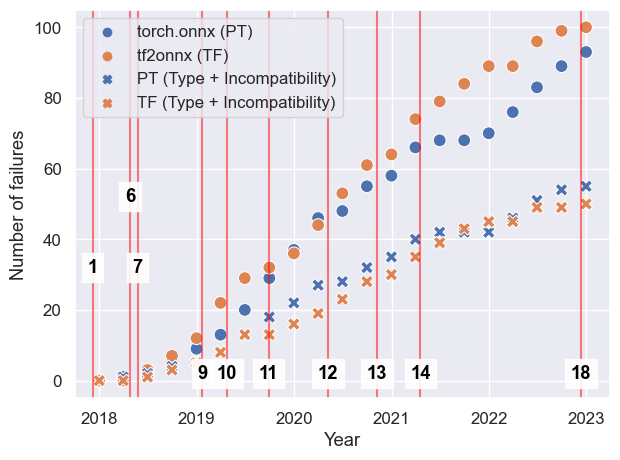

In [98]:
seaborn.set(font_scale=1.1)
fig = plt.figure()
fig.tight_layout(pad=0)
blue = seaborn.color_palette()[0]
orange = seaborn.color_palette()[1]
# g = seaborn.lineplot(
#     x[["PT", "TF", "PT (Type + Incompatibility)", "TF (Type + Incompatibility)"]],
#     legend="brief",
#     markers={"PT": "o", "TF": "o", 'TF (Type + Incompatibility)': "X", 'PT (Type + Incompatibility)': "X"},
#     markersize=9,
#     palette={"PT": blue, "TF": orange, 'TF (Type + Incompatibility)': orange, 'PT (Type + Incompatibility)': blue},
#     linewidth=2.5,
# )
g = seaborn.scatterplot(
    x[["torch.onnx (PT)", "tf2onnx (TF)", "PT (Type + Incompatibility)", "TF (Type + Incompatibility)"]],
    legend="brief",
    markers={"torch.onnx (PT)": "o", "tf2onnx (TF)": "o", 'TF (Type + Incompatibility)': "X", 'PT (Type + Incompatibility)': "X"},
    # sizes={"PT": 15, "TF": 9, 'TF (Type + Incompatibility)': 9, 'PT (Type + Incompatibility)': 9},
    s=85,
    # markersize=9,
    palette={"torch.onnx (PT)": blue, "tf2onnx (TF)": orange, 'TF (Type + Incompatibility)': orange, 'PT (Type + Incompatibility)': blue},
    # linewidth=2.5,
)
seaborn.move_legend(g, "upper left")
prev_date = None
for i, op_set in enumerate(list(op_history)[::-1]):
    date = op_history.loc["date", op_set]
    if not op_history.loc["changes", op_set] > 10:
        continue
    if date == prev_date:
        continue
    prev_date = date
    plt.axvline(
        pd.to_datetime(date),
        0,
        1,
        color="red",
        label=f"{op_set}",
        linewidth=1.5,
        linestyle="-",
        alpha=0.5,
    )
    # label = plt.text(pd.to_datetime(date), 10, f'{op_set}',rotation=0, fontsize='small')
    y_loc = 2
    if op_set == 6:
        y_loc += 50
    elif op_set == 1:
        y_loc += 30
    elif op_set == 7:
        y_loc += 30
    t = plt.annotate(
        f"{op_set}",
        (pd.to_datetime(date), y_loc),
        ha="center",
        va="center",
        fontweight="heavy",
        color="black",
        backgroundcolor="white",
        fontsize="medium",
        alpha=1,
    )
    t.set_bbox(dict(alpha=0.9, facecolor="white"))
# plt.xticks(rotation=40)
plt.ylabel("Number of failures")
plt.xlabel("Year")
plt.tight_layout(pad=0)
# plt.savefig("./failure_overtime_cum.png", dpi=300, facecolor=fig.get_facecolor())
plt.savefig("./failure_overtime_cum_scatter.png", dpi=300, facecolor=fig.get_facecolor())



# Opset Increases

In [99]:
op_history = pd.read_json("onnx_opset_diff.json")
op_history.loc[["added", "updated"]] = op_history.loc[["added", "updated"]].applymap(
    lambda x: len(x)
)
op_history.loc["changes"] = op_history.loc["added"] + op_history.loc["updated"]
op_history


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
added,78,0,0,0,0,0,8,2,17,13,17,1,0,1,3,1,3,5
updated,0,4,1,1,1,24,18,5,10,6,35,11,67,11,3,8,0,12
date,2017-12-06,2018-03-21,2018-03-21,2018-03-21,2018-03-21,2018-04-25,2018-05-24,2018-08-30,2019-01-22,2019-04-24,2019-09-27,2020-05-08,2020-11-06,2021-04-19,2021-07-30,2022-02-17,2022-06-17,2022-12-12
changes,78,4,1,1,1,24,26,7,27,19,52,12,67,12,6,9,3,17


<Figure size 640x480 with 0 Axes>

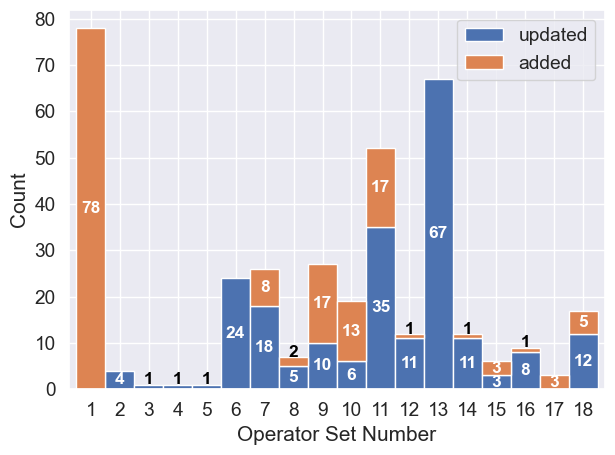

In [100]:
seaborn.set(font_scale=1.25)
fig = plt.figure()
fig.tight_layout(pad=0)
op_history.loc[['updated', 'added']].transpose().plot(kind='bar', stacked=True, width=1, rot=0)
for i, op_set in enumerate(list(op_history)[::-1]):
    added = op_history.loc['added', op_set]
    updated = op_history.loc['updated', op_set]
    if updated:
        y_loc = (updated / 2) if not updated < 3 else updated + 1
        color = "white" if not updated < 3 else "black"
        t = plt.annotate(
            f"{updated}",
            (op_set - 1, (updated / 2) + 0.05 if not updated == 1 else 2),
            ha="center",
            va="center",
            fontweight="heavy",
            color=color,
            # backgroundcolor="white",
            fontsize="small",
            # alpha=1,
        )
    if added:
        y_loc = (updated + added / 2) if not added < 3 else updated + added + 1
        color = "white" if not added < 3 else "black"
        t = plt.annotate(
            f"{added}",
            (op_set - 1, y_loc),
            ha="center",
            va="center",
            fontweight="heavy",
            color=color,
            # backgroundcolor="white",
            fontsize="small",
            # alpha=1,
        )
    # t.set_bbox(dict(alpha=0.9, facecolor="white"))
# plt.legend(fontsize="") # using a named size
plt.xlabel("Operator Set Number")
plt.ylabel("Count")
plt.savefig("./operators_over_time.png", dpi=300, facecolor=fig.get_facecolor())

# Spearman Correlation

In [101]:
filt_pt_issues = read_issues("./issue-data/filt_pytorch_issues.json")
filt_tf_issues = read_issues("./issue-data/filt_tf2onnx_issues.json")

In [103]:
pt_results_all = pd.read_excel("./FailureAnalysis.xlsx", sheet_name=0).iloc[
    :, :14
]
tf_results_all = pd.read_excel("./FailureAnalysis.xlsx", sheet_name=1).iloc[
    :, :14
]

In [105]:
pt_results_all = pt_results_all.set_index("id")
tf_results_all = tf_results_all.set_index("id")
sampled_pt_issues_results = pt_results_all.join(filt_pt_issues, lsuffix="samp_")
sampled_tf_issues_results = tf_results_all.join(filt_tf_issues, lsuffix="samp_")
sampled_both_issues_results = pd.concat(
    [sampled_pt_issues_results, sampled_tf_issues_results]
)


In [106]:
pt_incomps = sampled_pt_issues_results.loc[sampled_pt_issues_results['Type'] == "Incompatability"]
tf_incomps = sampled_tf_issues_results.loc[sampled_tf_issues_results['Type'] == "Incompatability"]
pt_type = sampled_pt_issues_results.loc[sampled_pt_issues_results['Type'] == "Type Problem"]
tf_type = sampled_tf_issues_results.loc[sampled_tf_issues_results['Type'] == "Type Problem"]

In [107]:
pt_all_causes = sampled_pt_issues_results.loc[
    (sampled_pt_issues_results["created_at"] > "2017-12-06")
    & (sampled_pt_issues_results["created_at"] < "2022-12-12")
]
tf_all_causes = sampled_tf_issues_results.loc[
    (sampled_tf_issues_results["created_at"] > "2017-12-06")
    & (sampled_tf_issues_results["created_at"] < "2022-12-12")
]


In [108]:
pt_incomps = pt_incomps.loc[
    (pt_incomps["created_at"] > "2017-12-06")
    & (pt_incomps["created_at"] < "2022-12-12")
]
tf_incomps = tf_incomps.loc[
    (tf_incomps["created_at"] > "2017-12-06")
    & (tf_incomps["created_at"] < "2022-12-12")
]
pt_type = pt_type.loc[
    (pt_type["created_at"] > "2017-12-06") & (pt_type["created_at"] < "2022-12-12")
]
tf_type = tf_type.loc[
    (tf_type["created_at"] > "2017-12-06") & (tf_type["created_at"] < "2022-12-12")
]

In [109]:
op_history

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
added,78,0,0,0,0,0,8,2,17,13,17,1,0,1,3,1,3,5
updated,0,4,1,1,1,24,18,5,10,6,35,11,67,11,3,8,0,12
date,2017-12-06,2018-03-21,2018-03-21,2018-03-21,2018-03-21,2018-04-25,2018-05-24,2018-08-30,2019-01-22,2019-04-24,2019-09-27,2020-05-08,2020-11-06,2021-04-19,2021-07-30,2022-02-17,2022-06-17,2022-12-12
changes,78,4,1,1,1,24,26,7,27,19,52,12,67,12,6,9,3,17


In [110]:
op_binned = pd.DataFrame(
    0,
    index=op_history.loc["date"].drop_duplicates(),
    columns=[
        "PT Incompatibility",
        "TF Incompatibility",
        "PT Type Problem",
        "TF Type Problem",
        "PT",
        "TF",
        "changes"
    ],
)

In [111]:
for i in range(len(op_binned.index) - 1):
    date_1 = op_binned.index[i]
    date_2 = op_binned.index[i+1]
    op_binned.loc[date_1, 'PT'] = pt_all_causes.loc[(pt_all_causes['created_at'] > date_1) & (pt_all_causes['created_at'] < date_2)].shape[0]
    op_binned.loc[date_1, 'TF'] = tf_all_causes.loc[(tf_all_causes['created_at'] > date_1) & (tf_all_causes['created_at'] < date_2)].shape[0]
    op_binned.loc[date_1, 'PT Incompatibility'] = pt_incomps.loc[(pt_incomps['created_at'] > date_1) & (pt_incomps['created_at'] < date_2)].shape[0]
    op_binned.loc[date_1, 'TF Incompatibility'] = tf_incomps.loc[(tf_incomps['created_at'] > date_1) & (tf_incomps['created_at'] < date_2)].shape[0]
    op_binned.loc[date_1, 'PT Type Problem'] = pt_type.loc[(pt_type['created_at'] > date_1) & (pt_type['created_at'] < date_2)].shape[0]
    op_binned.loc[date_1, 'TF Type Problem'] = tf_type.loc[(tf_type['created_at'] > date_1) & (tf_type['created_at'] < date_2)].shape[0]
    op_binned.loc[date_1, "changes"] = op_history.transpose().loc[op_history.transpose()['date'] == date_1, 'changes'].sum()
    op_binned.loc[date_1, "added"] = op_history.transpose().loc[op_history.transpose()['date'] == date_1, 'added'].sum()
    op_binned.loc[date_1, "updated"] = op_history.transpose().loc[op_history.transpose()['date'] == date_1, 'updated'].sum()
op_binned.loc[:, "Total"] = op_binned.loc[:, 'PT'] + op_binned.loc[:, 'TF']

In [112]:
op_binned['Incomp+Type'] = op_binned.iloc[:,0:4].sum(axis=1)
op_binned['Incomp+Type Norm'] = op_binned['Incomp+Type'] / op_binned['Total']
op_binned = op_binned.fillna(0)

In [113]:
op_binned

,PT Incompatibility,TF Incompatibility,PT Type Problem,TF Type Problem,PT,TF,changes,added,updated,Total,Incomp+Type,Incomp+Type Norm
date,,,,,,,,,,,,
2017-12-06,1,0,0,0,1,0,78,78.0,0.0,1,1,1.000000
2018-03-21,1,0,0,0,1,1,7,0.0,7.0,2,1,0.500000
2018-04-25,0,0,0,0,0,0,24,0.0,24.0,0,0,0.000000
2018-05-24,2,2,0,1,3,6,26,8.0,18.0,9,5,0.555556
2018-08-30,0,1,1,1,4,7,7,2.0,5.0,11,3,0.272727
2019-01-22,0,3,4,1,5,10,27,17.0,10.0,15,8,0.533333
2019-04-24,5,2,4,2,15,8,19,13.0,6.0,23,13,0.565217
2019-09-27,5,1,4,7,18,17,52,17.0,35.0,35,17,0.485714
2020-05-08,4,5,2,2,9,13,12,1.0,11.0,22,13,0.590909


In [114]:
op_binned_pruned = op_binned[['changes', 'added', 'updated','Total', 'Incomp+Type', 'Incomp+Type Norm']].iloc[1:-1,:]
op_binned_pruned

,changes,added,updated,Total,Incomp+Type,Incomp+Type Norm
date,,,,,,
2018-03-21,7,0.0,7.0,2,1,0.500000
2018-04-25,24,0.0,24.0,0,0,0.000000
2018-05-24,26,8.0,18.0,9,5,0.555556
2018-08-30,7,2.0,5.0,11,3,0.272727
2019-01-22,27,17.0,10.0,15,8,0.533333
2019-04-24,19,13.0,6.0,23,13,0.565217
2019-09-27,52,17.0,35.0,35,17,0.485714
2020-05-08,12,1.0,11.0,22,13,0.590909
2020-11-06,67,0.0,67.0,24,16,0.666667


In [115]:
op_binned_pruned.iloc[0] = op_binned_pruned.iloc[0:3].sum()
op_binned_pruned = op_binned_pruned.drop(op_binned_pruned.iloc[1:3].index)
op_binned_pruned.loc['2018-03-21', 'Incomp+Type Norm'] = op_binned_pruned.loc['2018-03-21', 'Incomp+Type'] / op_binned_pruned.loc['2018-03-21', 'Total']

In [119]:
op_binned_pruned

,changes,added,updated,Total,Incomp+Type,Incomp+Type Norm
date,,,,,,
2018-03-21,57,8.0,49.0,11,6,0.545455
2018-08-30,7,2.0,5.0,11,3,0.272727
2019-01-22,27,17.0,10.0,15,8,0.533333
2019-04-24,19,13.0,6.0,23,13,0.565217
2019-09-27,52,17.0,35.0,35,17,0.485714
2020-05-08,12,1.0,11.0,22,13,0.590909
2020-11-06,67,0.0,67.0,24,16,0.666667
2021-04-19,12,1.0,11.0,5,4,0.800000
2021-07-30,6,3.0,3.0,14,7,0.500000


In [120]:
op_binned_pruned.corr("spearman")

,changes,added,updated,Total,Incomp+Type,Incomp+Type Norm
changes,1.000000,0.147816,0.899543,0.356980,0.528606,0.332575
added,0.147816,1.000000,-0.157054,0.145840,0.090282,-0.562266
updated,0.899543,-0.157054,1.000000,0.224257,0.441649,0.487473
Total,0.356980,0.145840,0.224257,1.000000,0.905963,-0.045663
Incomp+Type,0.528606,0.090282,0.441649,0.905963,1.000000,0.232879
Incomp+Type Norm,0.332575,-0.562266,0.487473,-0.045663,0.232879,1.000000
